In [1]:
"CELDA N°1"
#Instalar el paquete de SpaCy para análisis de textos
!pip install --upgrade spacy

     |████████████████████████████████| 12.8MB 302kB/s 
     |████████████████████████████████| 9.1MB 38.7MB/s 
     |████████████████████████████████| 1.1MB 41.3MB/s 
     |████████████████████████████████| 460kB 39.2MB/s 
     |████████████████████████████████| 122kB 43.9MB/s 
  Created wheel for smart-open: filename=smart_open-3.0.0-cp37-none-any.whl size=107098 sha256=23cdd4a86e50b3c42faf04a13107640b421a85059ec0e167b1ad78fce07b2424
  Stored in directory: /root/.cache/pip/wheels/18/88/7c/f06dabd5e9cabe02d2269167bcacbbf9b47d0c0ff7d6ebcb78
Successfully built smart-open
ERROR: catalogue 2.0.2 has requirement importlib-metadata<3.3.0,>=0.20; python_version < "3.8", but you'll have importlib-metadata 3.10.0 which is incompatible.
  Found existing installation: catalogue 1.0.0
    Uninstalling catalogue-1.0.0:
      Successfully uninstalled catalogue-1.0.0
  Found existing installation: srsly 1.0.5
    Uninstalling srsly-1.0.5:
      Successfully uninstalled srsly-1.0.5
  Found existing i

In [2]:
"CELDA N°2"
#Una vez instalado Spacy, descargar el modelo español pre-entrenado es_core_news_lg
!python -m spacy download es_core_news_lg

2021-04-14 16:27:45.343169: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
     |████████████████████████████████| 569.7MB 26kB/s 
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_lg')


In [3]:
"CELDA N°3"
#Importar las librerías necesarias
import spacy
import es_core_news_lg
from spacy.lang.es.stop_words import STOP_WORDS

#Crear la variable nlp para guardar en ella el nmodelo pre-entrenado español
nlp = es_core_news_lg.load()

#Añadir a una lista propia -subjetiva- aquellos caracteres que consideramos no aportan para evaluación
stop_list = ["a", "y", "o", "Y", "A", "e", "O", "xq", "Q", "q", "k", "x", "d", "m", "xd", "v", "favor", "hola"]

#Actualizar los stopwords
nlp.Defaults.stop_words.update(stop_list)

#Iterar sobre los stopwords y los califica como tal.
for word in STOP_WORDS:
    lexeme = nlp.vocab[word]
    lexeme.is_stop = True

In [4]:
"CELDA N°4"
#Crear la función remove_stopwords con 1 parámetro de entrada -doc donde se almacena cada opinión o texto a analizar
def remove_stopwords(doc):
    # Pipeline para remover los stopwords en los docs.
    doc = [token.text.lower() for token in doc if not token.is_stop and token.is_alpha]
    return doc

In [5]:
"CELDA N°5"
#Importar la librerías necesarias para realizar el preprocesamiento de los datos
import tweepy as tw
import pandas as pd

Para la siguiente celda es necesario conseguir el **perfil** de [Twitter Developer](https://developer.twitter.com/en/products/twitter-api) por las **credenciales** 

In [6]:
"CELDA N°6"
#Crear las variables correspondientes a tus credenciales de Twitter Developer
consumer_key= 'evLyV6KdkwBHlsZLLpMI6iS8t'
consumer_secret= 'ZYBfdJ5rqS7QeRmmbfPBuFL1BXqZEu5dzd0s0fFAxc0vALcwa0'
access_token= '488524456-dppxlmqewjRr2TwezVjCrUVMEMJ9Vxywu5GbO64A'
access_token_secret= 'N8iAuF5fixod56IkKcrBqPXhFoBwEaJdT4xleiM6lr10I'

In [7]:
"CELDA N°7"
#Convocar la api de Twitter con las variables de la celda anterior
auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth, wait_on_rate_limit=True)

In [8]:
"CELDA N°8"
#Crear variables necesarias para realizar la búsqueda de los tweets
search_words = "bbva+credito" #Ingresar aquí las dos palabras de búsqueda (se recomienda máximo 2)
date_since = "2020-11-01" #Ingresar la fecha de inicio donde Twitter recopilará los tweets
new_search = search_words + " -filter:retweets" #Eliminar los re-tweets

In [9]:
"CELDA N°9"
#Crear la variable tweets donde guardar los tweets buscados
tweets = tw.Cursor(api.search,q=new_search,lang="es",since=date_since).items(3000)

In [10]:
"CELDA N°9"
#Crear la variable users_logs donde se almacen tres (3) datos de los tweets: usuario, ubicación y tweet
users_logs = [[tweet.user.screen_name, tweet.user.location, tweet.text] for tweet in tweets]

In [11]:
"CELDA N°10"
#Generar el dataframe (tabla) en base a la información obtenida
tweet_data = pd.DataFrame(data=users_logs,columns=['user', "location", "tweet"])
tweet_data

,user,location,tweet
0,Pfizercovid19,,@ChellBacon80 @JLozanoA @senadomexicano @LaRaz...
1,AytoGaldar,Gáldar,El Ayuntamiento firma con BBVA la refinanciaci...
2,solosanborns,Ciudad de México.,@_The_Puga Buenos días.\nContamos con las sigu...
3,Donuts_es,España,@BBVA_espana Wow! No damos crédito a vuestra p...
4,uni_moron,"Morón, Argentina",3 CUOTAS SIN INTERÉS\n\n¡Con tarjetas de crédi...
...,...,...,...
215,alvjenniferrr,"Buenos Aires, Argentina",Intentando dar de baja la tarjeta BBVA me term...
216,jatzirigr27,,No ves que tengo 85 varos en mi tarjeta y me q...
217,BBVAPrensa_peru,"Lima, Perú",BBVA: ¿En cuánto podría aumentar el crédito en...
218,MatuteDario,,"20h\nOjo !!!!, con EL Banco BBVA, Que si no te..."


In [17]:
"CELDA N°11"
#Definimos una función para eliminar de los tweets alguna palabra, simbolo o caracter especial (que irá en el parámetro pattern) que creamos conveniente
import re
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
    return input_txt

#Quitamos todas aquellas menciones dentro de los tweets a otros usuarios (que comienzan con @)
import numpy as np
tweet_data['tweet'] = np.vectorize(remove_pattern)(tweet_data['tweet'], "@[\w]*")  #llamamos la función remove_pattern y el parámetro pattern será @[\w]*

#Reemplazamos todos aquellos carácteres especiales como signos de puntuación por un espacio en blanco
tweet_data['tweet'] = tweet_data['tweet'].str.replace("[^a-zA-Z#]", " ") #el simbolo ^ signfica "todo menos" en este caso palabras y números 

#Removemos todas aquellas palabras con un largo de 3 caracteres o menos que podrían incluir conectores, advervios, artículos (por ejemplo a, and, the)
tweet_data['tweet'] = tweet_data['tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

#Dividimos los tweets en palabras y guardamos el resultado en una variable denominada tokenized_tweet
tokenized_tweet = tweet_data['tweet'].apply(lambda x: x.split()) #el comando split signfica dividir

#Ahora procederemos a extraer solo la raíz de las palabras para un mejor análisis y actualizamos nuestra variable tokenized_tweet
from nltk.stem.porter import * 
stemmer = PorterStemmer() 
tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming

#Finalmente juntamos cada raíz de palabra para almacenarla nuevamente en la columna tidy_tweet
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])    
tweet_data['tweet'] = tokenized_tweet

In [18]:
"CELDA N°12"
#Instalar el paquete de Análisis de Sentimiento
!pip install spanish_sentiment_analysis

     |████████████████████████████████| 15.8MB 3.0MB/s 
     |████████████████████████████████| 276kB 26.5MB/s 
  Created wheel for marisa-trie: filename=marisa_trie-0.7.5-cp37-cp37m-linux_x86_64.whl size=861784 sha256=bdea3441eec5b991a904afd695fc93dcde4acd94719b3625705709ab18eaac7f
  Stored in directory: /root/.cache/pip/wheels/45/24/79/022624fc914f0e559fe8a1141aaff1f9df810905a13fc75d57
Successfully built marisa-trie


In [19]:
"CELDA N°13"
#Importar la librería necesaria para ejecutar el Análisis de Sentimiento
from classifier import SentimentClassifier
clf = SentimentClassifier()

/usr/local/lib/python3.7/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


Will download some functions from the nltk package if not found on the computer
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [20]:
"CELDA N°14"
#Crear la columna score_sentiment donde añadir la columna del score obtenida con el Análisis de Sentimiento
tweet_data["score_sentiment"] = tweet_data.tweet.apply(lambda s: round(clf.predict(s),4))

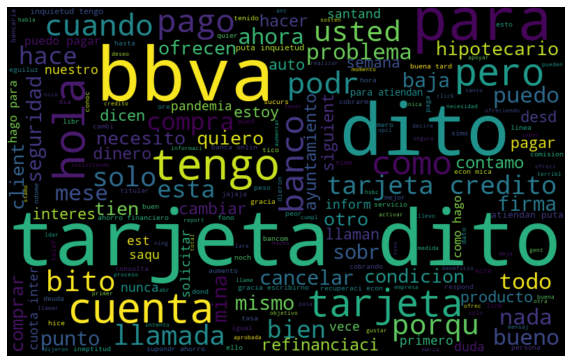

In [24]:
"CELDA N°15"
from wordcloud import WordCloud
all_words = ' '.join([text for text in tweet_data['tweet']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words) 
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

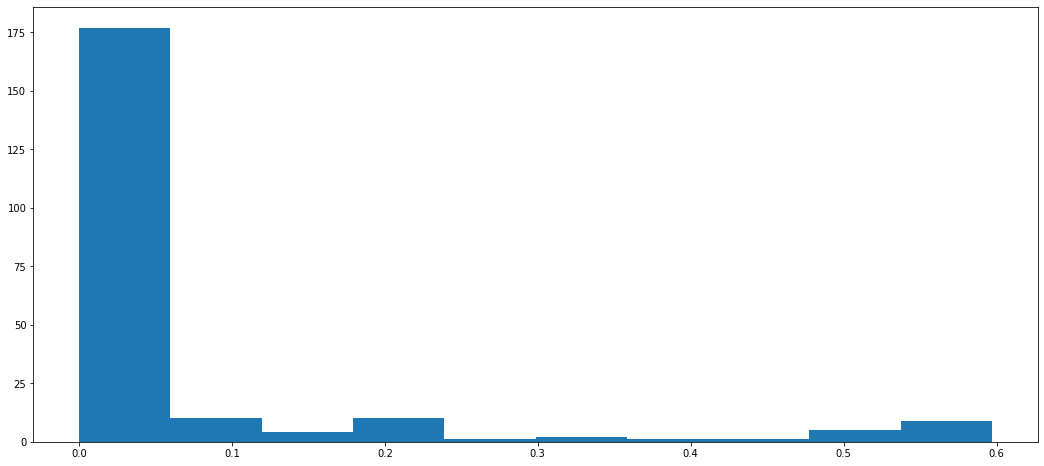

In [25]:
"CELDA N°16"
#Generar el gráfico para reflejar los puntajes
plt.figure(figsize=(18, 8))
plt.hist(tweet_data["score_sentiment"])
plt.show()

In [ ]:
"CELDA N°17"
#Generar el csv de Excel para guardar todo lo trabajado 
tweet_data.to_csv("patricia_gamarra_2021.csv", sep=";", encoding='utf-8')